✓ Dataset loaded successfully!
COMPREHENSIVE DATA EXPLORATION REPORT

1. DATASET OVERVIEW

Dataset Shape: 1000 rows × 8 columns
Memory Usage: 0.06 MB

--- First 5 Rows ---
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  

--- Last 5 Rows ---
     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_B

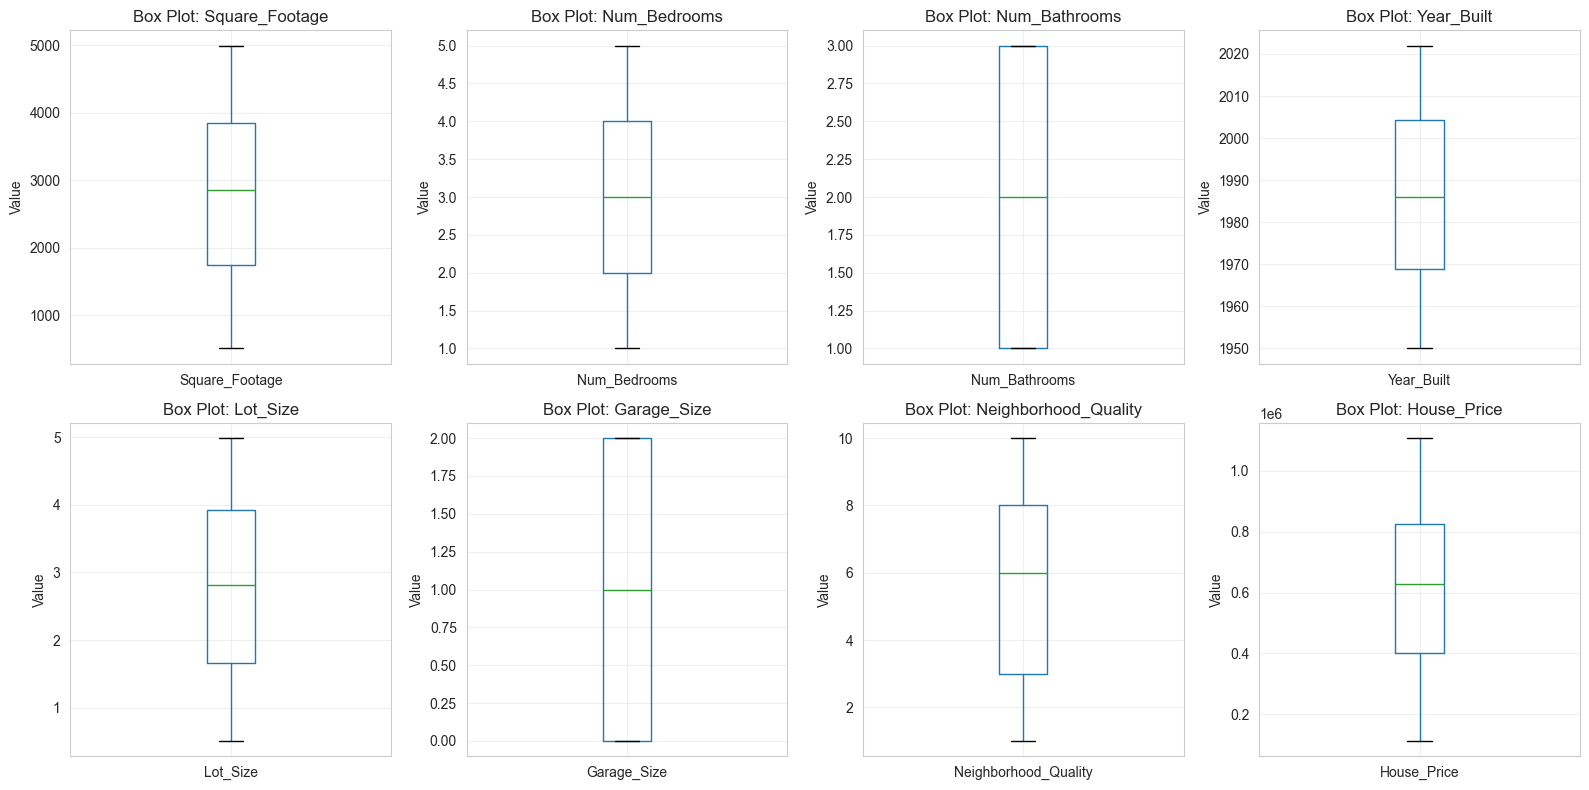

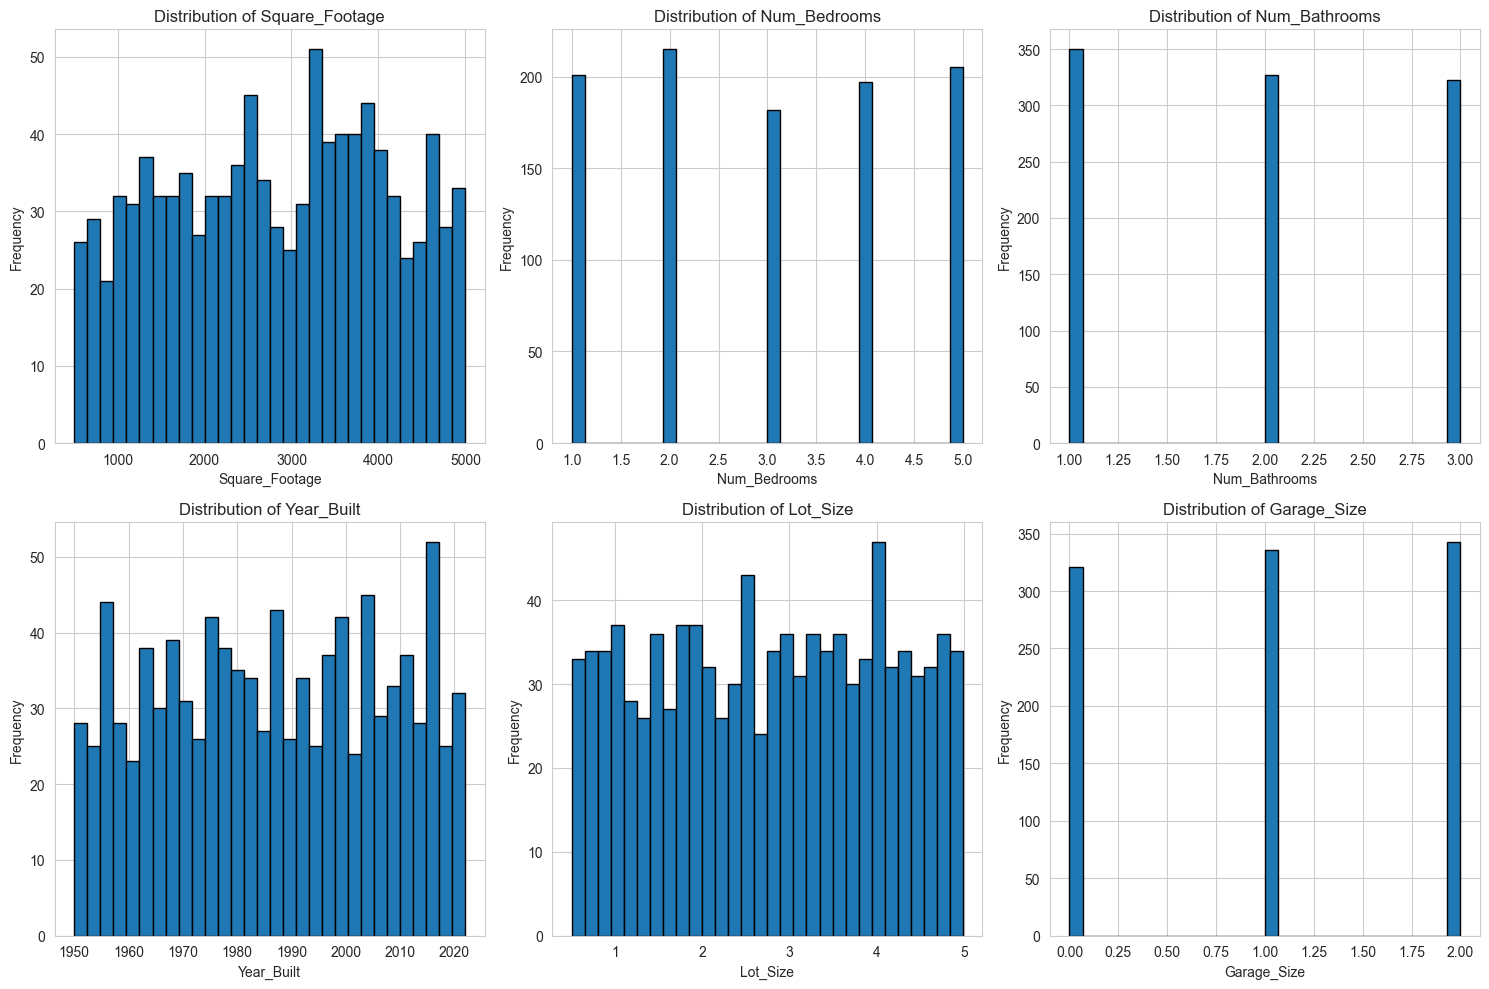


6. CATEGORICAL FEATURES ANALYSIS

✓ No categorical columns found in the dataset.

7. CORRELATION ANALYSIS (Numerical Features)

--- Highly Correlated Feature Pairs (|correlation| > 0.7) ---
     Feature_1   Feature_2  Correlation
Square_Footage House_Price     0.991261


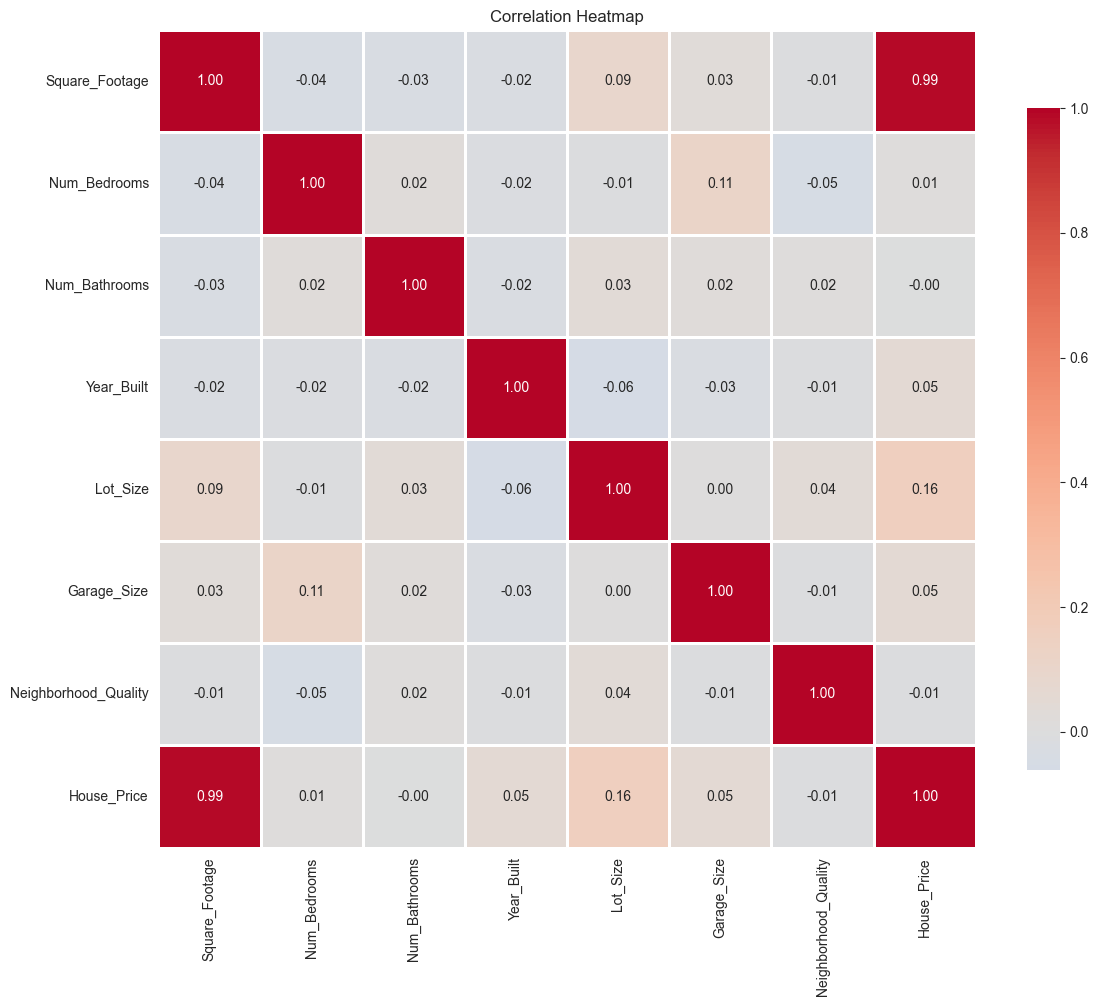


8. TREND ANALYSIS

✓ Target variable identified: House_Price

--- Features Most Correlated with Target ---
             Feature  Abs_Correlation
         House_Price         1.000000
      Square_Footage         0.991261
            Lot_Size         0.160412
         Garage_Size         0.052133
          Year_Built         0.051967
        Num_Bedrooms         0.014633
Neighborhood_Quality         0.007770
       Num_Bathrooms         0.001862

--- Generating Scatter Plots: Top Features vs Target ---


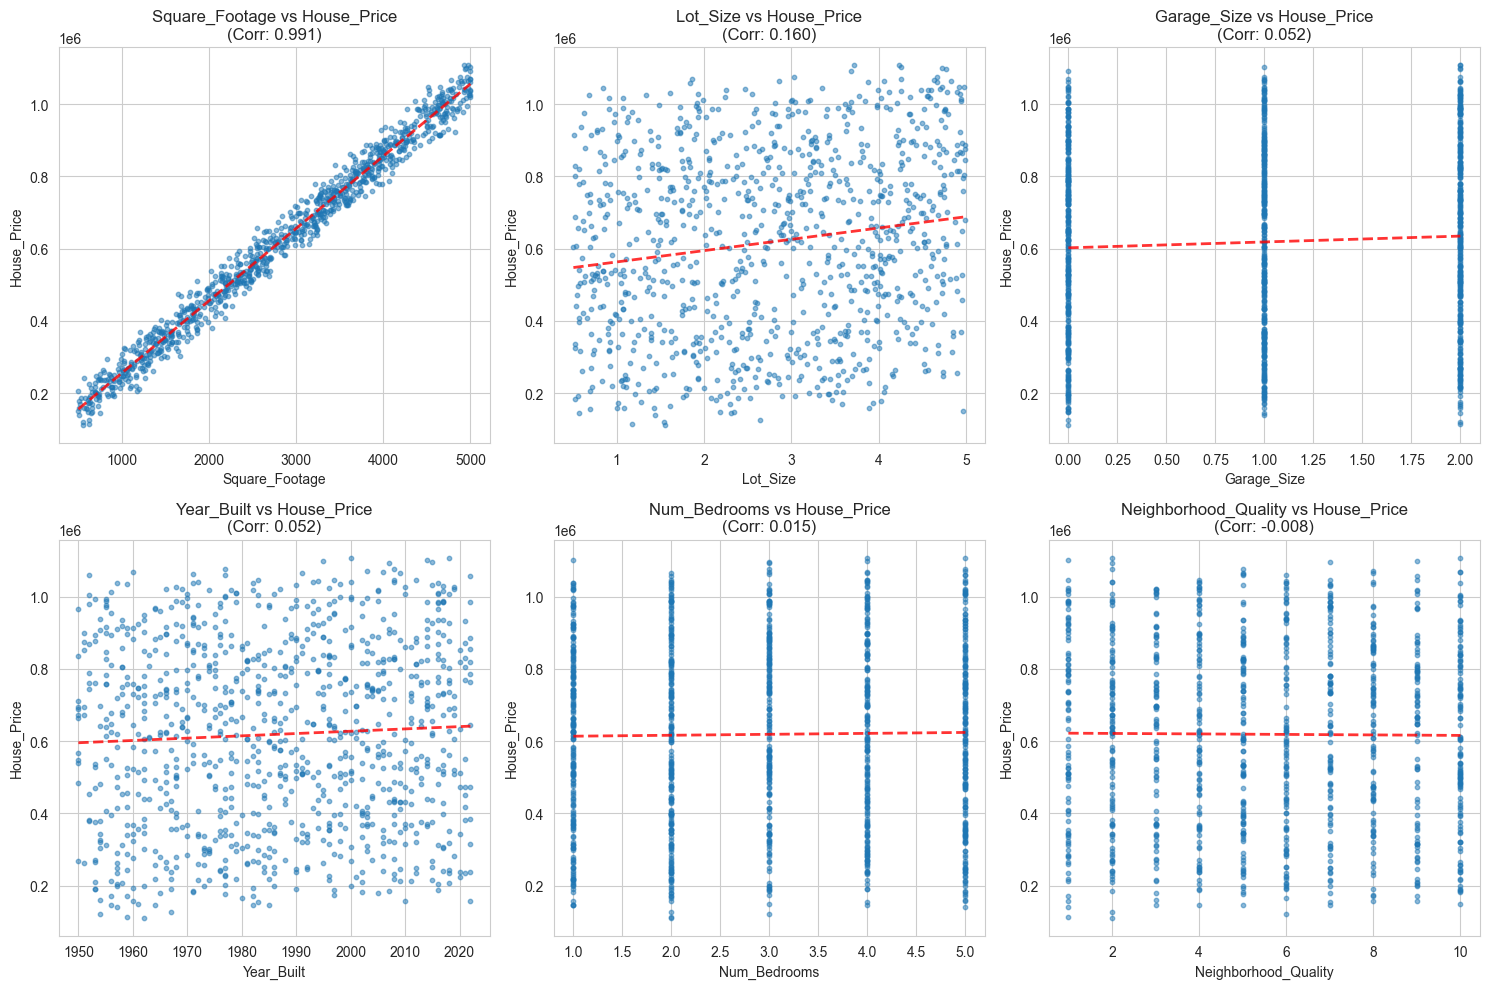


9. DATA QUALITY CHECKS

✓ No constant columns found

📌 Potential ID columns (unique for each row): ['Lot_Size', 'House_Price']

END OF COMPREHENSIVE DATA EXPLORATION REPORT

10. DATA CLEANSING & PREPARATION FOR MODELING
✓ Dropped 0 duplicate rows (based on non-ID columns).
✓ Applied log-transform (np.log1p) to target variable: House_Price
✓ Defining features (X) and target (y).
✓ Split data into training and testing sets:
  Training set: 800 samples
  Testing set:  200 samples
✓ Identified 6 numeric features for pipeline.
✓ Identified 0 categorical features for pipeline.

11. MODEL TRAINING (Demonstration)

--- Training Linear Regression ---
✓ Model trained successfully.

--- Training Random Forest ---
✓ Model trained successfully.

12. MODEL EVALUATION

--- Evaluating: Linear Regression ---
Metrics (Original 'House_Price' Scale):
  R-squared (R²): 0.9248
  Mean Absolute Error (MAE): $53,157.21
  Root Mean Squared Error (RMSE): $69,623.86

Metrics (Log 'House_Price' Scale):
  Root Mea

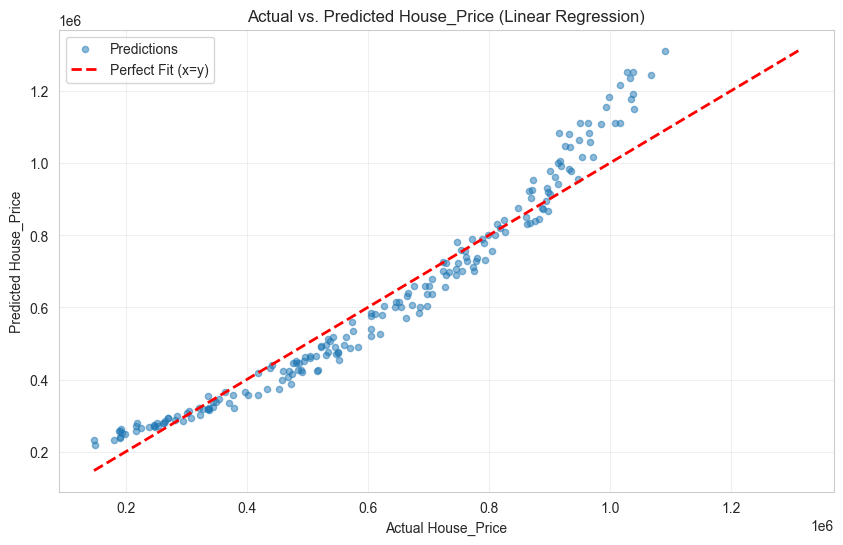

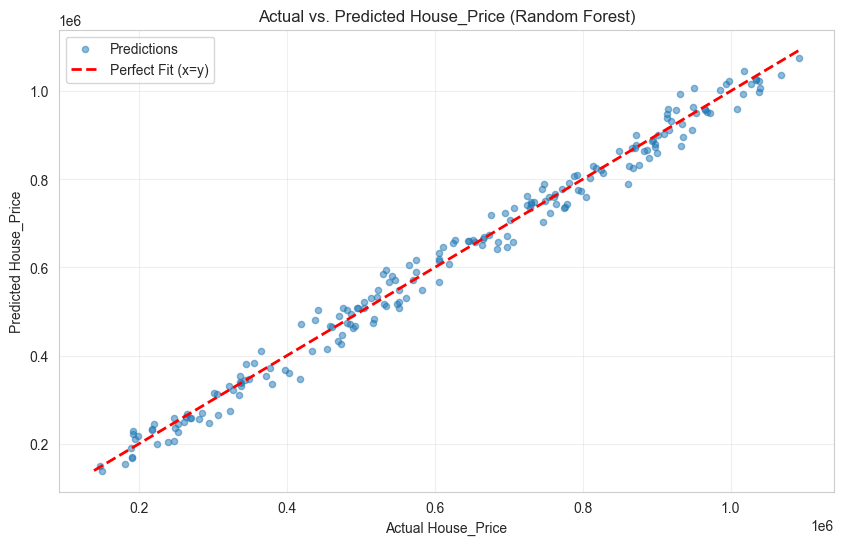


✅ All plots generated. The best model is Random Forest.

END OF REGRESSION ANALYSIS REPORT


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# --- Add these new imports for modeling ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# ------------------------------------------

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
try:
    df = pd.read_csv('house_price_regression_dataset.csv')
    print("✓ Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'house_price_regression_dataset.csv' not found. Please check the file path.")
    data = {'LotFrontage': [65, 80, np.nan], 'SalePrice': [208500, 181500, 223500]}
    df = pd.DataFrame(data)

print("=" * 80)
print("COMPREHENSIVE DATA EXPLORATION REPORT")
print("=" * 80)

# ============================================================================
# 1. DATASET OVERVIEW
# ============================================================================
print("\n" + "=" * 80)
print("1. DATASET OVERVIEW")
print("=" * 80)

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Last 5 Rows ---")
print(df.tail())
print("\n--- Random Sample (5 rows) ---")
print(df.sample(min(5, len(df)), random_state=42))

# ============================================================================
# 2. DATA TYPES & STRUCTURE
# ============================================================================
print("\n" + "=" * 80)
print("2. DATA TYPES & STRUCTURE")
print("=" * 80)

print("\n--- Column Data Types ---")
print(df.dtypes.value_counts())
print("\n--- Detailed Info ---")
df.info()

# Identify column types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\n📊 Numeric Columns ({len(numeric_cols)}): {numeric_cols[:10]}{'...' if len(numeric_cols) > 10 else ''}")
print(f"📝 Categorical Columns ({len(categorical_cols)}): {categorical_cols[:10]}{'...' if len(categorical_cols) > 10 else ''}")
print(f"📅 DateTime Columns ({len(datetime_cols)}): {datetime_cols}")

# ============================================================================
# 3. MISSING VALUES ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("3. MISSING VALUES ANALYSIS")
print("=" * 80)

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠️  Total columns with missing values: {len(missing_df)}")
    print(f"⚠️  Total missing values: {missing_counts.sum()}")
    print(f"⚠️  Percentage of dataset with any missing: {(df.isnull().any(axis=1).sum() / len(df)) * 100:.2f}%")
    print("\n--- Missing Values Summary ---")
    print(missing_df.to_string(index=False))
    
    # Visualize missing values
    if len(missing_df) <= 20:
        plt.figure(figsize=(12, 6))
        plt.barh(missing_df['Column'], missing_df['Missing_Percent'])
        plt.xlabel('Missing Percentage (%)')
        plt.title('Missing Values by Column')
        plt.tight_layout()
        plt.show()
else:
    print("\n✓ No missing values found in the dataset!")

print("\n" + "=" * 80)
print("4. DUPLICATE ROWS ANALYSIS")
print("=" * 80)

# Check for exact duplicates (all columns)
duplicates_all = df.duplicated().sum()
print(f"\n📊 Exact duplicates (all columns): {duplicates_all}")

if duplicates_all > 0:
    print(f"   Percentage: {(duplicates_all / len(df)) * 100:.2f}%")
    print("\n--- Sample Duplicate Rows (showing all instances) ---")
    duplicate_mask = df.duplicated(keep=False)
    print(df[duplicate_mask].sort_values(by=df.columns.tolist()).head(10))
    
    print("\n--- First Occurrence vs Duplicates ---")
    print(f"   First occurrences: {(~df.duplicated(keep='first')).sum()}")
    print(f"   Duplicate occurrences:s {df.duplicated(keep='first').sum()}")
else:
    print("   ✓ No exact duplicate rows found!")

# Check for duplicates based on subset of columns (excluding potential ID columns)
potential_ids = [col for col in df.columns if df[col].nunique() == len(df)]
if potential_ids:
    non_id_cols = [col for col in df.columns if col not in potential_ids]
    if non_id_cols:
        duplicates_subset = df.duplicated(subset=non_id_cols).sum()
        print(f"\n📊 Duplicates (excluding ID columns {potential_ids}): {duplicates_subset}")
        if duplicates_subset > 0:
            print(f"   Percentage: {(duplicates_subset / len(df)) * 100:.2f}%")
            print(f"   ⚠️  These rows have identical values except for ID columns")


# ============================================================================
# 5. NUMERICAL FEATURES ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("5. NUMERICAL FEATURES ANALYSIS")
print("=" * 80)

if len(numeric_cols) > 0:
    print("\n--- Descriptive Statistics ---")
    print(df[numeric_cols].describe().T)
    
    # Additional statistics
    print("\n--- Advanced Statistics ---")
    adv_stats = pd.DataFrame({
        'Column': numeric_cols,
        'Median': df[numeric_cols].median(),
        'Mode': df[numeric_cols].mode().iloc[0] if len(df[numeric_cols].mode()) > 0 else np.nan,
        'Skewness': df[numeric_cols].apply(lambda x: skew(x.dropna())),
        'Kurtosis': df[numeric_cols].apply(lambda x: kurtosis(x.dropna())),
        'Range': df[numeric_cols].max() - df[numeric_cols].min(),
        'IQR': df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
        'CV(%)': (df[numeric_cols].std() / df[numeric_cols].mean() * 100).round(2)
    })
    print(adv_stats.to_string(index=False))
    
    # ========================================================================
    # ENHANCED OUTLIER DETECTION (IQR Method) - FIXED
    # ========================================================================
    print("\n--- Outlier Detection (IQR Method) ---")
    outlier_summary = []
    
    for col in numeric_cols:
        # Drop NaN values for calculation
        col_data = df[col].dropna()
        
        if len(col_data) > 0:
            Q1 = col_data.quantile(0.25)
            Q3 = col_data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers
            outliers_lower = (col_data < lower_bound).sum()
            outliers_upper = (col_data > upper_bound).sum()
            total_outliers = outliers_lower + outliers_upper
            
            if total_outliers > 0:
                outlier_summary.append({
                    'Column': col,
                    'Total_Outliers': total_outliers,
                    'Lower_Outliers': outliers_lower,
                    'Upper_Outliers': outliers_upper,
                    'Outlier_Pct': round((total_outliers / len(col_data)) * 100, 2),
                    'Lower_Bound': round(lower_bound, 2),
                    'Upper_Bound': round(upper_bound, 2)
                })
    
    if outlier_summary:
        outlier_df = pd.DataFrame(outlier_summary).sort_values('Total_Outliers', ascending=False)
        print(outlier_df.to_string(index=False))
    else:
        print("✓ No outliers detected in any numeric column")
    
    # ========================================================================
    # BOX PLOTS FOR OUTLIER VISUALIZATION
    # ========================================================================
    print("\n--- Generating Box Plots for Outlier Visualization ---")
    
    # Select columns with outliers or top numeric columns
    cols_to_plot = [item['Column'] for item in outlier_summary[:8]] if outlier_summary else numeric_cols[:8]
    
    if len(cols_to_plot) > 0:
        n_cols = min(4, len(cols_to_plot))
        n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        else:
            axes = axes.ravel() if n_rows > 1 else axes
        
        for idx, col in enumerate(cols_to_plot):
            if idx < len(axes):
                ax = axes[idx]
                df.boxplot(column=col, ax=ax, vert=True)
                ax.set_title(f'Box Plot: {col}')
                ax.set_ylabel('Value')
                ax.grid(True, alpha=0.3)
        
        # Hide empty subplots
        for idx in range(len(cols_to_plot), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    # Distribution plots for first few numeric columns
    if len(numeric_cols) > 0:
        cols_to_plot = numeric_cols[:6]
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()
        
        for idx, col in enumerate(cols_to_plot):
            if idx < len(axes):
                df[col].hist(bins=30, ax=axes[idx], edgecolor='black')
                axes[idx].set_title(f'Distribution of {col}')
                axes[idx].set_xlabel(col)
                axes[idx].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()

# ============================================================================
# 6. CATEGORICAL FEATURES ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("6. CATEGORICAL FEATURES ANALYSIS")
print("=" * 80)

if len(categorical_cols) > 0:
    print("\n--- Categorical Features Summary ---")
    cat_summary = pd.DataFrame({
        'Column': categorical_cols,
        'Unique_Values': [df[col].nunique() for col in categorical_cols],
        'Most_Frequent': [df[col].mode()[0] if len(df[col].mode()) > 0 else None for col in categorical_cols],
        'Most_Frequent_Count': [df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols],
        'Most_Frequent_Pct': [(df[col].value_counts().iloc[0] / len(df) * 100) if len(df[col].value_counts()) > 0 else 0 for col in categorical_cols]
    })
    print(cat_summary.to_string(index=False))
    
    # Value counts for first few categorical columns
    print("\n--- Top Categories for Each Feature ---")
    for col in categorical_cols[:5]:
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))
else:
    print("\n✓ No categorical columns found in the dataset.")

# ============================================================================
# 7. CORRELATION ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("7. CORRELATION ANALYSIS (Numerical Features)")
print("=" * 80)

if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    
    # Find highly correlated pairs
    print("\n--- Highly Correlated Feature Pairs (|correlation| > 0.7) ---")
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append({
                    'Feature_1': corr_matrix.columns[i],
                    'Feature_2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
        print(high_corr_df.to_string(index=False))
    else:
        print("✓ No highly correlated pairs found (threshold: 0.7)")
    
    # Correlation heatmap for top features
    if len(numeric_cols) <= 15:
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                    square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Heatmap')
        plt.tight_layout()
        plt.show()

# ============================================================================
# 8. TREND ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("8. TREND ANALYSIS")
print("=" * 80)

# Check if there's a target variable (common names for house prices)
target_candidates = ['SalePrice', 'Price', 'price', 'saleprice', 'target', 'Target']
target_col = 'House_Price' 

for candidate in target_candidates:
    if candidate in df.columns:
        target_col = candidate
        break

if target_col and target_col in numeric_cols:
    print(f"\n✓ Target variable identified: {target_col}")
    
    # Correlation with target
    print("\n--- Features Most Correlated with Target ---")
    target_corr = df[numeric_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
    target_corr_df = pd.DataFrame({
        'Feature': target_corr.index,
        'Abs_Correlation': target_corr.values
    })
    print(target_corr_df.head(15).to_string(index=False))
    
    # Scatter plots: Top correlated features vs target
    print("\n--- Generating Scatter Plots: Top Features vs Target ---")
    top_features = target_corr_df[target_corr_df['Feature'] != target_col].head(6)['Feature'].tolist()
    
    if len(top_features) > 0:
        n_plots = min(6, len(top_features))
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()
        
        for idx, feature in enumerate(top_features[:n_plots]):
            ax = axes[idx]
            ax.scatter(df[feature], df[target_col], alpha=0.5, s=10)
            ax.set_xlabel(feature)
            ax.set_ylabel(target_col)
            ax.set_title(f'{feature} vs {target_col}\n(Corr: {df[feature].corr(df[target_col]):.3f})')
            
            # Add trend line
            mask = df[[feature, target_col]].notna().all(axis=1)
            if mask.sum() > 1:
                z = np.polyfit(df.loc[mask, feature], df.loc[mask, target_col], 1)
                p = np.poly1d(z)
                ax.plot(df.loc[mask, feature].sort_values(), 
                       p(df.loc[mask, feature].sort_values()), 
                       "r--", alpha=0.8, linewidth=2)
        
        plt.tight_layout()
        plt.show()
    
    # Categorical vs Target analysis
    if len(categorical_cols) > 0:
        print("\n--- Categorical Features Impact on Target ---")
        print("(Mean target value by category)")
        
        for cat_col in categorical_cols[:5]:
            if df[cat_col].nunique() <= 20:  # Only for low cardinality
                print(f"\n{cat_col}:")
                grouped = df.groupby(cat_col)[target_col].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
                print(grouped.head(10))

else:
    print("\n⚠️  No target variable detected. Showing general trends...")
    
    # Time-based trends if datetime columns exist
    if len(datetime_cols) > 0:
        print(f"\n--- Time-based Trends Found ---")
        for dt_col in datetime_cols[:2]:
            print(f"\nTrends over {dt_col}:")
            if len(numeric_cols) > 0:
                # Plot first numeric column over time
                plt.figure(figsize=(12, 5))
                plt.plot(df[dt_col], df[numeric_cols[0]])
                plt.xlabel(dt_col)
                plt.ylabel(numeric_cols[0])
                plt.title(f'{numeric_cols[0]} over {dt_col}')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
    
    # Pairwise relationships for top numeric features
    if len(numeric_cols) >= 3:
        print("\n--- Pairwise Relationships (Top 5 Features) ---")
        top_vars = numeric_cols[:5]
        sns.pairplot(df[top_vars].dropna(), diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
        plt.suptitle('Pairwise Relationships', y=1.01)
        plt.show()

# ============================================================================
# 9. DATA QUALITY ISSUES
# ============================================================================
print("\n" + "=" * 80)
print("9. DATA QUALITY CHECKS")
print("=" * 80)

# Check for constant columns
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
if constant_cols:
    print(f"\n⚠️  Constant columns (may need removal): {constant_cols}")
else:
    print("\n✓ No constant columns found")

# Check for high cardinality in categorical features
if categorical_cols:
    high_cardinality = [col for col in categorical_cols if df[col].nunique() > len(df) * 0.5]
    if high_cardinality:
        print(f"\n⚠️  High cardinality categorical features: {high_cardinality}")
    else:
        print("✓ No high cardinality categorical features")

# Check for potential ID columns
potential_ids = [col for col in df.columns if df[col].nunique() == len(df)]
if potential_ids:
    print(f"\n📌 Potential ID columns (unique for each row): {potential_ids}")

# Check for negative values where they shouldn't be
numeric_negative = {}
for col in numeric_cols:
    if (df[col] < 0).any():
        numeric_negative[col] = (df[col] < 0).sum()

if numeric_negative:
    print(f"\n⚠️  Columns with negative values:")
    for col, count in numeric_negative.items():
        print(f"  {col}: {count} negative values")

print("\n" + "=" * 80)
print("END OF COMPREHENSIVE DATA EXPLORATION REPORT")
print("=" * 80)



# ============================================================================
# 10. DATA CLEANSING & PREPARATION FOR MODELING
# ============================================================================
print("\n" + "=" * 80)
print("10. DATA CLEANSING & PREPARATION FOR MODELING")
print("=" * 80)

# Create a copy for modeling to keep the original EDA dataframe intact
df_model = df.copy()

# --- 1. Handle Duplicates ---
# Using 'potential_ids' and 'non_id_cols' identified in Section 4
if 'non_id_cols' in locals() and non_id_cols:
    initial_rows = len(df_model)
    df_model.drop_duplicates(subset=non_id_cols, keep='first', inplace=True)
    rows_dropped = initial_rows - len(df_model)
    print(f"✓ Dropped {rows_dropped} duplicate rows (based on non-ID columns).")
else:
    initial_rows = len(df_model)
    df_model.drop_duplicates(keep='first', inplace=True)
    rows_dropped = initial_rows - len(df_model)
    print(f"✓ Dropped {rows_dropped} exact duplicate rows.")

# --- 2. Handle Target Variable Skew ---
# Use 'target_col' identified in Section 8
if target_col and target_col in df_model.columns:
    # Apply log transform to fix right-skew (common for price data)
    df_model[target_col] = np.log1p(df_model[target_col])
    print(f"✓ Applied log-transform (np.log1p) to target variable: {target_col}")
    
    # --- 3. Define Features (X) and Target (y) ---
    print("✓ Defining features (X) and target (y).")
    y = df_model[target_col]
    
    # Drop target and any identified ID columns from features
    cols_to_drop = [target_col] + potential_ids
    X = df_model.drop(columns=[col for col in cols_to_drop if col in df_model.columns])
    
    # --- 4. Split Data into Training and Testing Sets ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"✓ Split data into training and testing sets:")
    print(f"  Training set: {X_train.shape[0]} samples")
    print(f"  Testing set:  {X_test.shape[0]} samples")

    # --- 5. Identify Feature Types for Pipeline ---
    # Re-identify numeric and categorical features from X
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f"✓ Identified {len(numeric_features)} numeric features for pipeline.")
    print(f"✓ Identified {len(categorical_features)} categorical features for pipeline.")

else:
    print("\n⚠️ ERROR: Target variable not found. Cannot proceed with modeling.")
    # Set X_train to None to skip modeling sections
    X_train = None

# ============================================================================
# 11. MODEL TRAINING (Demonstration)
# ============================================================================

# Only run if setup in Section 10 was successful
if X_train is not None:
    print("\n" + "=" * 80)
    print("11. MODEL TRAINING (Demonstration)")
    print("=" * 80)

    # --- 1. Create Preprocessing Pipelines ---
    
    # Numeric Pipeline: Impute missing values with the median, then scale
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Categorical Pipeline: Impute missing values with the most frequent, then one-hot encode
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # --- 2. Combine Pipelines with ColumnTransformer ---
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Keep any columns not specified (e.g., datetime)
    )

    # --- 3. Define Models to Train ---
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
    }
    
    trained_pipelines = {}

    # --- 4. Train Models ---
    for name, model in models.items():
        print(f"\n--- Training {name} ---")
        
        # Create the full pipeline: Preprocess -> Model
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        # Train the model
        model_pipeline.fit(X_train, y_train)
        
        trained_pipelines[name] = model_pipeline
        print(f"✓ Model trained successfully.")

# ============================================================================
# 12. MODEL EVALUATION
# ============================================================================

def plot_actual_vs_predicted(y_test_orig, y_pred_orig, model_name):
    """Generates a scatter plot of Actual vs. Predicted values."""
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_orig, y_pred_orig, alpha=0.5, s=20, label="Predictions")
    
    # Add a 45-degree line for reference (Perfect Fit)
    min_val = min(y_test_orig.min(), y_pred_orig.min())
    max_val = max(y_test_orig.max(), y_pred_orig.max())
    plt.plot([min_val, max_val], [min_val, max_val], 
             'r--', lw=2, label="Perfect Fit (x=y)")
             
    plt.xlabel(f"Actual {target_col}")
    plt.ylabel(f"Predicted {target_col}")
    plt.title(f"Actual vs. Predicted {target_col} ({model_name})")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Only run if models were trained
if 'trained_pipelines' in locals() and trained_pipelines:
    print("\n" + "=" * 80)
    print("12. MODEL EVALUATION")
    print("=" * 80)
    
    evaluation_results = {}
    
    # --- 1. Calculate Metrics and Store Predictions ---
    model_predictions = {}
    for name, pipeline in trained_pipelines.items():
        print(f"\n--- Evaluating: {name} ---")
        
        # Make predictions on the test set
        y_pred_log = pipeline.predict(X_test)
        
        # --- Inverse Transform Predictions ---
        y_test_orig = np.expm1(y_test)
        y_pred_orig = np.expm1(y_pred_log)
        model_predictions[name] = y_pred_orig # Store predictions
        
        # --- Calculate Metrics (on the original dollar scale) ---
        r2 = r2_score(y_test_orig, y_pred_orig)
        mae = mean_absolute_error(y_test_orig, y_pred_orig)
        mse = mean_squared_error(y_test_orig, y_pred_orig)
        rmse = np.sqrt(mse)
        
        # Store for comparison
        evaluation_results[name] = {'R²': r2, 'MAE': mae, 'RMSE': rmse}
        
        print(f"Metrics (Original '{target_col}' Scale):")
        print(f"  R-squared (R²): {r2:.4f}")
        print(f"  Mean Absolute Error (MAE): ${mae:,.2f}")
        print(f"  Root Mean Squared Error (RMSE): ${rmse:,.2f}")
        
        # Also show log-scale RMSE (RMSLE)
        rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
        print(f"\nMetrics (Log '{target_col}' Scale):")
        print(f"  Root Mean Squared Log Error (RMSLE): {rmse_log:.4f}")

    # --- 2. Summary Table ---
    print("\n--- Model Comparison Summary ---")
    results_df = pd.DataFrame(evaluation_results).T.sort_values('RMSE', ascending=True)
    results_df['MAE'] = results_df['MAE'].map('${:,.2f}'.format)
    results_df['RMSE'] = results_df['RMSE'].map('${:,.2f}'.format)
    results_df['R²'] = results_df['R²'].map('{:.4f}'.format)
    print(results_df)

    # --- 3. Data Visualization: Actual vs. Predicted (All Models) ---
    print("\n--- Generating Visualization: Actual vs. Predicted for Each Model ---")
    
    for name, y_pred_orig in model_predictions.items():
        plot_actual_vs_predicted(y_test_orig, y_pred_orig, name)
    
    # Optional: Plot the best model again explicitly
    best_model_name = results_df.index[0]
    print(f"\n✅ All plots generated. The best model is {best_model_name}.")

print("\n" + "=" * 80)
print("END OF REGRESSION ANALYSIS REPORT")
print("=" * 80)